In [1]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [3]:
# # Run to munge LC data
# lc = pd.read_csv(lc_path)
# lc = lc[['hjd', 'mag', 'mag err']]
# lc['mjd'] = jd.jd_to_mjd(lc['hjd'])
# lc = lc.rename(columns={'mag err':'magerr'}).drop(columns='hjd')
# lc.to_csv('mira/Mira_LC.csv')

In [4]:
# specify path to the lightcurve and spectrum
lc_path = "Cep-I/Cepheids/SDSS/257.62963_22.385772_ZTFlc.fits"

# object name (or abbreviation)
n = "Cep-I"

# resample length for time-sorted LC purposes
resample_len = '5d'

In [5]:
# #load into pandas dataframes
# lc = pd.read_csv(lc_path)
# spec = pd.read_csv(spec_path)

# time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)
# phase_preproc_lc = LC_phasesort_preproc(lc, bins=phase_bins())
# phasefit_preproc_lc = LC_phasefit_preproc(lc_path, bins=phase_bins())
# preproc_spec = spectra_preproc(spec, bins=wavelength_bins())

# #create output directory
# outdir = 'preproc/{}/'.format(n)
# if not os.path.exists(outdir):
#     os.makedirs(outdir)   

# Period in Days

In [83]:
# #load data into astropy table, sort by mjd, and remove phase
# data = ascii.read(lc_path, format='csv', fast_reader=False)
# data.sort('mjd')
# #data.remove_column('phase')
# flc_data, LC_stat_properties = LCtools.process_LC(data, fltRange=5.0, detrend=True)

# #Use LombScargle periodogram to find the best fit period (in days)
# omega = LCtools.perdiodSearch(flc_data)[0]['P'] 

# print("The period is", omega, "days")

# Ben's SDSS Data

## Time-Sorted Light Curve

In [6]:
from astropy.table import Table
dat = Table.read(lc_path, format='fits')
lc = dat.to_pandas()

In [7]:
lc = lc[lc['filtercode'] == b'zr']

In [8]:
lc

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
271,586216100003171,44449947,2.458199e+06,58198.499479,15.467622,0.010591,0,b'zr',257.629632,22.385768,...,16,1,21.430000,26.134407,0.018315,0.082354,0.000003,30.0,1.076,1
272,586216100003171,44450141,2.458199e+06,58198.501412,15.487531,0.010614,0,b'zr',257.629596,22.385777,...,16,1,21.309999,26.138367,0.017783,0.084616,0.000003,30.0,1.073,1
273,586216100003171,46238209,2.458217e+06,58216.382095,15.496568,0.010625,0,b'zr',257.629615,22.385794,...,16,1,20.680000,26.015488,0.022982,0.091274,0.000005,30.0,1.317,1
274,586216100003171,46442337,2.458219e+06,58218.423380,15.384699,0.010500,0,b'zr',257.629650,22.385776,...,16,1,21.040001,26.072153,0.019745,0.087418,0.000003,30.0,1.124,2
275,586216100003171,46542484,2.458220e+06,58219.424849,15.314198,0.010429,0,b'zr',257.629720,22.385799,...,16,1,20.959999,26.031439,0.022766,0.086785,0.000005,30.0,1.113,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,1631207100000606,92828792,2.458683e+06,58682.287928,15.569701,0.010544,0,b'zr',257.629648,22.385758,...,7,1,20.889999,26.234632,0.021503,0.090883,0.000004,30.0,1.094,3
834,1631207100000606,94123651,2.458696e+06,58695.236516,15.477960,0.010425,0,b'zr',257.629600,22.385774,...,7,1,21.549999,26.205843,0.017954,0.092530,0.000003,30.0,1.061,2
835,1631207100000606,94123696,2.458696e+06,58695.236968,15.343379,0.010273,0,b'zr',257.629637,22.385765,...,7,1,21.690001,26.214983,0.020914,0.086151,0.000004,30.0,1.062,3
836,1631207100000606,97424097,2.458729e+06,58728.240972,15.314359,0.010244,0,b'zr',257.629652,22.385755,...,7,1,20.870001,26.049761,0.021608,0.097530,0.000004,30.0,1.473,2


In [9]:
time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)

In [10]:
print("The observations span",str(round(lc.mjd.max()-lc.mjd.min(), 2)),"days")

The observations span 1313.62 days


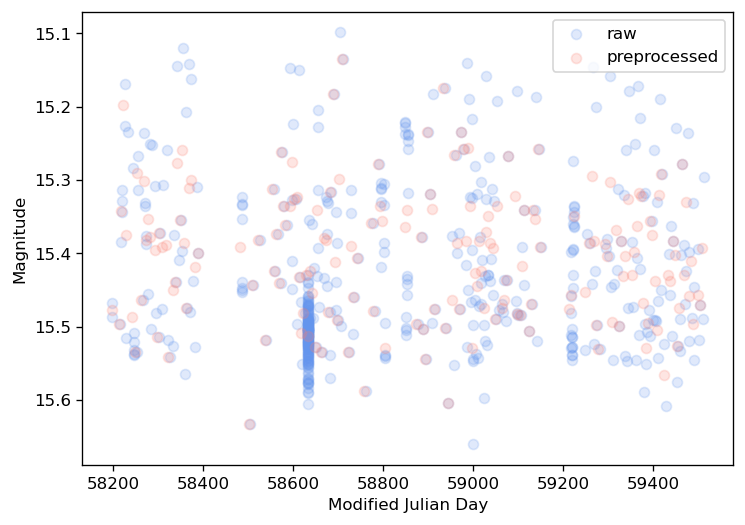

In [109]:
fig1 = plot_timesort(lc, time_preproc_lc)

In [110]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc) / 8.5), "s")

Estimated video time of 30.941176470588236 s


## PHASED LIGHTCURVE

In [118]:
period, phase_preproc_lc, phasefit_preproc_lc = phase_LC(lc, bins=phase_bins(), rephased=False, flc=False, detrend=False, detrend_deg=3)

In [119]:
period

1.191497474025355

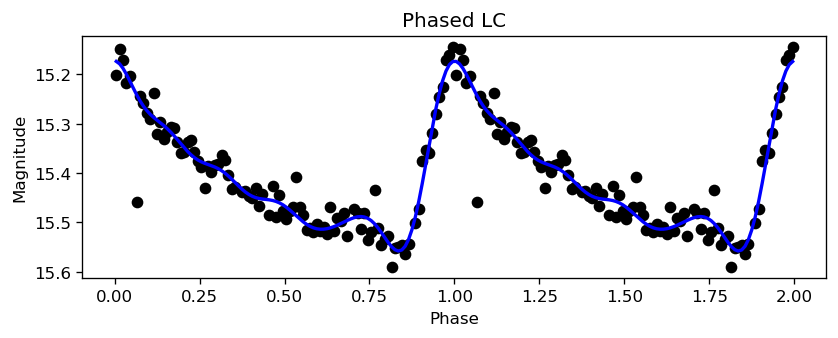

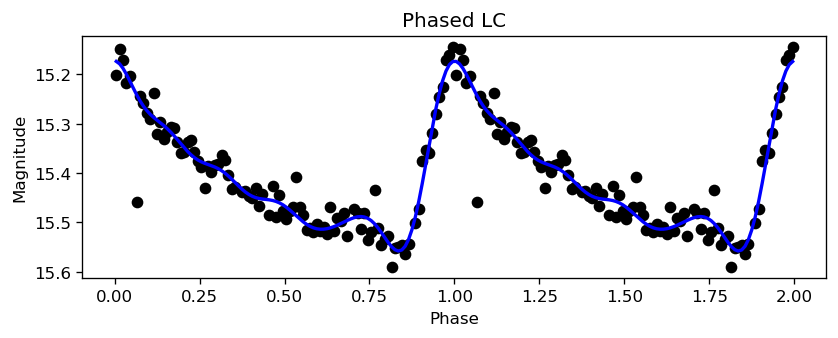

In [120]:
plot_phased(phase_preproc_lc, phasefit_preproc_lc)

# Paul's Data

In [143]:
# # specify path to the lightcurve and spectrum
# paul_lc_path = "Cep-I/Cepheids/V0526_Aql_ASASN_lc.csv"

# # object name (or abbreviation)
# n = "Cep-I"

# # resample length for time-sorted LC purposes
# resample_len = '5d'

## Raw Light Curve Exploration

In [144]:
# lc = pd.read_csv(paul_lc_path)


In [145]:
# lc['mjd'] = jd.jd_to_mjd(lc['hjd'])

In [146]:
# lc = lc.rename(columns={'mag err': 'magerr'})

In [147]:
# time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)

In [148]:
# print("The observations span",str(round(lc.mjd.max()-lc.mjd.min(), 2)),"days")

In [149]:
# len(lc)

In [150]:
# lc['filter'].value_counts()

## Time Sorted Light Curve

In [151]:
# len(lc)

In [152]:
# fig1 = plot_timesort(lc, time_preproc_lc)

In [153]:
# len(time_preproc_lc)

In [154]:
# len(lc)

In [155]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
# print("Estimated video time of "+ str(len(time_preproc_lc) / 8.5), "s")

## Phased LC

In [156]:
# period, phase_preproc_lc, phasefit_preproc_lc = phase_LC(lc, bins=phase_bins(), rephased=False, flc=False, detrend=False, detrend_deg=3)

In [157]:
# period

In [158]:
# plot_phased(phase_preproc_lc, phasefit_preproc_lc)

# Spectra

In [121]:
spec1_path = "Cep-I/Cepheids/SDSS/212.12477-0.630875_302-51688-0167.txt"
spec2_path = "Cep-I/Cepheids/SDSS/257.62963+22.385772_1689-53177-0482.txt"

In [128]:
spec1 = pd.read_csv(spec1_path, delimiter='\s+', names=['wavelength', 'flux'])
spec2 = pd.read_csv(spec2_path, delimiter='\s+', names=['wavelength', 'flux'])

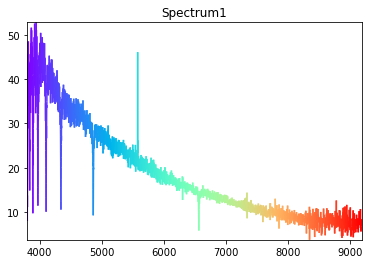

In [130]:
#raw data
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x1,y1 = spec1['wavelength'], spec1['flux']
x2,y2 = spec2['wavelength'], spec2['flux']
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(y1.min(), y1.max())
points = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x1.min(), x1.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x1)
ax.add_collection(lc)
ax.set_title('Spectrum1')
plt.show()

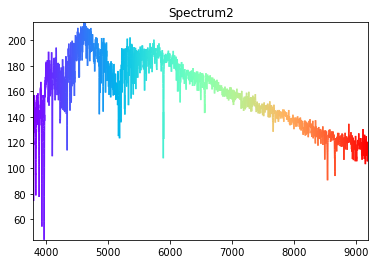

In [132]:
#raw data
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x2,y2 = spec2['wavelength'], spec2['flux']
ax.set_xlim(x2.min(), x2.max())
ax.set_ylim(y2.min(), y2.max())
points = np.array([x2, y2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x2.min(), x2.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x2)
ax.add_collection(lc)
ax.set_title('Spectrum2')
plt.show()

In [137]:
preproc_spec = spectra_preproc(spec2, bins=np.arange(4050,8790,20))

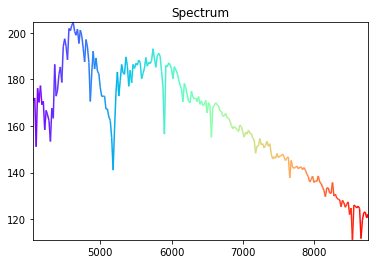

In [138]:
#preprocessed
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x,y = preproc_spec['Wavelength'], preproc_spec['Flux']
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x.min(), x.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x)
ax.add_collection(lc)
ax.set_title('Spectrum')
plt.show()

In [139]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(preproc_spec) / 8.5), "s")

Estimated video time of 27.764705882352942 s


# Save Preprocessed File

In [140]:
#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

In [141]:
#save preprocessed files
time_preproc_lc.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
phase_preproc_lc.to_csv("preproc/{}/{}_LC_phasesort.csv".format(n,n), index=False)
phasefit_preproc_lc.to_csv("preproc/{}/{}_LC_phasefit.csv".format(n,n), index=False)
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)